<a href="https://colab.research.google.com/github/sohelarfi0/LangGraph/blob/main/langGraph01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langgraph typing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 11.3 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=d1df109d21a79ab7b487d786e1a409c21f02df48ad49b2e4fbc0960e9d8f934b
  Stored in directory: /root/.cache/pip/wheels/12/98/52/2bffe242a9a487f00886e43b8ed8dac46456702e11a0d6abef
Successfully built typing
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pi

In [1]:
from typing import  Dict,TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
  message:str


def greeting_node(state:AgentState)-> AgentState:
  """Simple node that adds a greeting message to the state"""

  state['message']="Hey"+state["message"]+",how is your day going"

  return state

In [3]:
graph=StateGraph(AgentState)

graph.add_node("greeter",greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app=graph.compile()

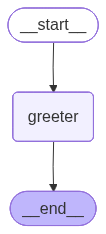

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result=app.invoke({"message": " Bob"})
result["message"]

'Hey Bob,how is your day going'

In [7]:
from typing import TypedDict, List

class AgentState1(TypedDict):
  values:List[int]
  name:str
  result:int